**Useful Imports**

In [1]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import csv
import plotly.graph_objects as go
import PIL as ThePIL

**Variable Declaration**

In [2]:
INFO = 1 # For debugging

# Change path to find nifti files on local computer
data = []
with open('scans.csv', newline='') as scanfile:
    reader = csv.DictReader(scanfile)
    for row in reader:
        dataRow = [ row['file_name'], float(row['rg_value']), [], 0, 0, 0, 0 ]
        data.append(dataRow)

**Extract Images**

In [3]:
idx = 0
for d in data:
    data[idx][2] = np.asarray(nb.load(d[0]).dataobj)
    idx += 1


**Plot Images**

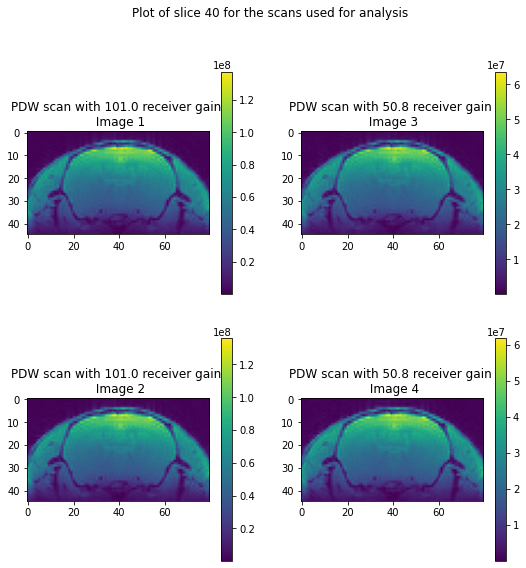

In [4]:
slice = 40 # Adjust this to change slice plotted

# Print preview of 4 scans with the various receiver gain
fig, frame = plt.subplots(2, 2, figsize=(9,9))
z1 = np.rot90(data[0][2][:,slice,:])
pos1 = frame[0, 0].imshow(z1)
frame[0, 0].set_title("PDW scan with {} receiver gain \n Image 1".format(data[0][1]))
fig.colorbar(pos1, ax=frame[0,0])

z2 = np.rot90(data[1][2][:,slice,:])
pos2 = frame[1, 0].imshow(z2)
frame[1, 0].set_title("PDW scan with {} receiver gain \n Image 2".format(data[1][1]))
fig.colorbar(pos2, ax=frame[1,0])

z3 = np.rot90(data[2][2][:,slice,:])
pos3 = frame[0, 1].imshow(z3)
frame[0, 1].set_title("PDW scan with {} receiver gain \n Image 3".format(data[2][1]))
fig.colorbar(pos3, ax=frame[0,1])

z4 = np.rot90(data[3][2][:,slice,:])
pos4= frame[1, 1].imshow(z4)
frame[1, 1].set_title("PDW scan with {} receiver gain \n Image 4".format(data[3][1]))
fig.colorbar(pos4, ax=frame[1,1])
fig.suptitle("Plot of slice " + str(slice) + " for the scans used for analysis")
plt.show()

#  Method 1: Averaging 4 images to get a ratio


**Averaging the images**

In [5]:
#Averaging the images with the same receiver gain

#ims = np.array([np.array(im) for im in ims])

img_101 = np.array([data[0][2], data[1][2]])
img_50 = np.array([data[2][2], data[3][2]])
img_50average = np.average(img_50,axis=0)
img_101average = np.average(img_101,axis=0)
img_50average.shape

(80, 90, 45)

**Ploting the averaged images**

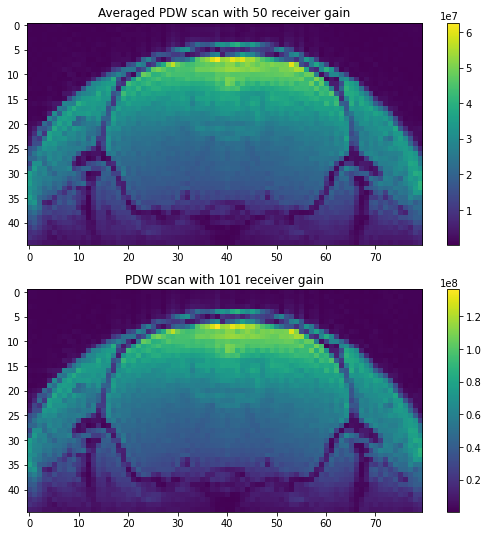

In [6]:
fig, frame = plt.subplots(2, figsize=(9,9))
y1 = np.rot90(img_50average[:,slice,:])
pos5 = frame[0].imshow(y1)
frame[0].set_title("Averaged PDW scan with 50 receiver gain")
fig.colorbar(pos5, ax=frame[0])

y2 = np.rot90(img_101average[:,slice,:])
pos6 = frame[1].imshow(y2)
frame[1].set_title("PDW scan with 101 receiver gain")
fig.colorbar(pos6, ax=frame[1])
plt.show()

**Computing the Ratio**

In [7]:
img_ratio = img_50average / img_101average
img_ratio.shape

(80, 90, 45)

**Plotting the ratioed image**

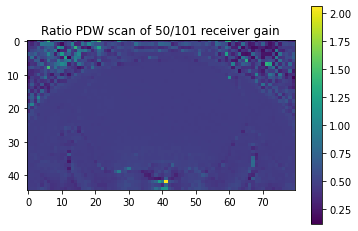

In [8]:
z1 = np.rot90(img_ratio[:,slice,:])
pos7 = plt.imshow(z1)
plt.colorbar(pos7)
plt.title("Ratio PDW scan of 50/101 receiver gain")
plt.show()

**Averaging the ratios**

In [9]:
np.mean(img_ratio)

0.47804945011767097

In [10]:
np.std(img_ratio)

0.12121891493557153

# Method 2: Computing 4 ratios and then averaging them

**Ratio and standard deviation for the 1st image at 101 gain and the 1st image at 50.8 gain**

In [11]:
img_ratio_1_3 = data[2][2]/data[0][2]
np.std(img_ratio_1_3)

0.2165479324621745

**Ratio and standard deviation for the 1st image at 101 gain and the 2nd image at 50.8 gain**

In [12]:
img_ratio_1_4 = data[3][2]/data[0][2]
np.std(img_ratio_1_4)

0.2683125335079688

**Ratio and standard deviation for the 2nd image at 101 gain and the 1st image at 50.8 gain**

In [13]:
img_ratio_2_3 = data[2][2]/data[1][2]
np.std(img_ratio_2_3)

0.2236858853966328

**Ratio and standard deviation for the 2nd image at 101 gain and the 2nd image at 50.8 gain**

In [14]:
img_ratio_2_4 = data[3][2]/data[1][2]
np.std(img_ratio_2_4)

0.2142232146416547

**Plot of the 4 ratios**

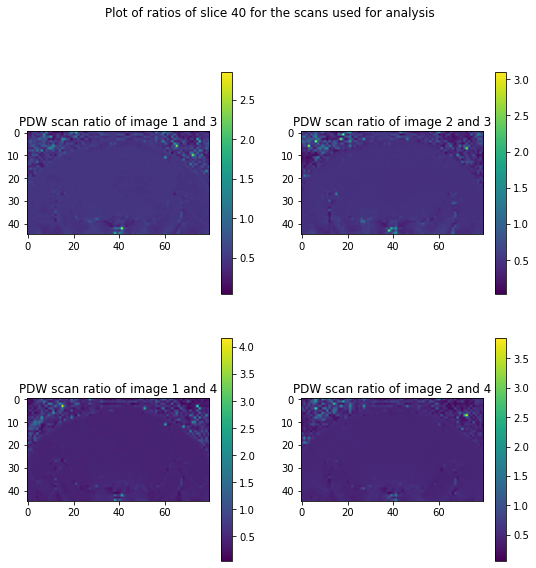

In [15]:
fig, frame = plt.subplots(2, 2, figsize=(9,9))
a1 = np.rot90(img_ratio_1_3[:,slice,:])
pos8 = frame[0, 0].imshow(a1)
frame[0, 0].set_title("PDW scan ratio of image 1 and 3")
fig.colorbar(pos8, ax=frame[0,0])

a2 = np.rot90(img_ratio_1_4[:,slice,:])
pos9 = frame[1, 0].imshow(a2)
frame[1, 0].set_title("PDW scan ratio of image 1 and 4")
fig.colorbar(pos9, ax=frame[1,0])

a3 = np.rot90(img_ratio_2_3[:,slice,:])
pos10 = frame[0, 1].imshow(a3)
frame[0, 1].set_title("PDW scan ratio of image 2 and 3")
fig.colorbar(pos10, ax=frame[0,1])

a4 = np.rot90(img_ratio_2_4[:,slice,:])
pos11= frame[1, 1].imshow(a4)
frame[1, 1].set_title("PDW scan ratio of image 2 and 4")
fig.colorbar(pos11, ax=frame[1,1])
fig.suptitle("Plot of ratios of slice " + str(slice) + " for the scans used for analysis")
plt.show()

**Computing the average of the 4 ratios**


In [16]:
ratio1 = np.mean(img_ratio_1_3)
ratio2 = np.mean(img_ratio_1_4)
ratio3 =np.mean(img_ratio_2_3)
ratio4 = np.mean(img_ratio_2_4)
avg = (ratio1 + ratio2 + ratio3 + ratio4) / 4
print('The average of numbers = %0.4f' %avg)

The average of numbers = 0.4953


**Computing the average of the 4 images**

In [18]:
img_average_4_ratio = np.array([img_ratio_1_3, img_ratio_1_4, img_ratio_2_3, img_ratio_2_4 ])
img_4std = np.std(img_average_4_ratio, axis=0)
img_4average = np.average(img_average_4_ratio,axis=0)
img_4average.shape

(80, 90, 45)

**Displaying the Averaged image**

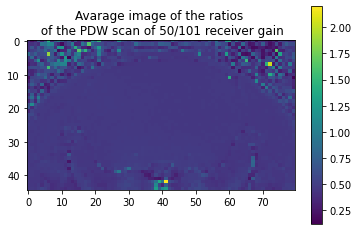

In [19]:
a5 = np.rot90(img_4average[:,slice,:])
pos12 = plt.imshow(a5)
plt.colorbar(pos12)
plt.title("Average image of the ratios \n of the PDW scan of 50/101 receiver gain")
plt.show()

In [24]:
np.mean(img_4average)

0.49529922632676104

**Displaying the Standard Deviation Image**

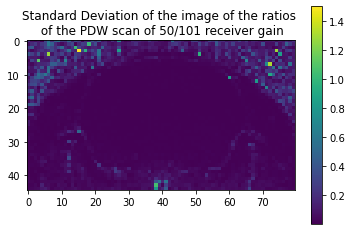

In [23]:
a6 = np.rot90(img_4std[:,slice,:])
pos12 = plt.imshow(a6)
plt.colorbar(pos12)
plt.title("Standard Deviation of the image of the ratios \n of the PDW scan of 50/101 receiver gain")
plt.show()

In [28]:
np.mean(img_4std)

0.07896956370963369